In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use("seaborn")

In [3]:
ass=pd.read_csv("/home/hamish/University/Third Year/MAS369 - Machine Learning/Assignment 1/ass.csv",index_col="Observations")

In [4]:
ass.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9
V1,1.000000,0.164804,0.007813,0.012752,-0.497798,-0.227074,-0.048866,0.109302,0.314024
V2,0.164804,1.000000,-0.366992,-0.173375,0.036194,0.289176,-0.586746,-0.180134,-0.273341
V3,0.007813,-0.366992,1.000000,0.579867,-0.363785,-0.390331,0.531813,-0.540883,0.070498
V4,0.012752,-0.173375,0.579867,1.000000,-0.516683,-0.622541,-0.130855,-0.243909,0.450059
V5,-0.497798,0.036194,-0.363785,-0.516683,1.000000,0.265969,-0.220770,-0.101352,-0.452643
V6,-0.227074,0.289176,-0.390331,-0.622541,0.265969,1.000000,-0.126814,-0.275773,-0.210907
V7,-0.048866,-0.586746,0.531813,-0.130855,-0.220770,-0.126814,1.000000,0.053412,-0.053724
V8,0.109302,-0.180134,-0.540883,-0.243909,-0.101352,-0.275773,0.053412,1.000000,-0.006446
V9,0.314024,-0.273341,0.070498,0.450059,-0.452643,-0.210907,-0.053724,-0.006446,1.000000


In [5]:
ass["V8"].corr(ass["V9"])

-0.006445713181155919

In [6]:
 ass["V3"].corr(ass["V4"])

0.579867112322457

In [7]:
ass["V4"].corr(ass["V6"])

-0.6225408939452463

In [8]:
print("correlation between V8 and V9 is -0.006445.... Implying no correlation between the variables")
print("V3, V4 have the highest positive correlation of 0.5798... and V4,V6 have the greatest negative correlation with -0.622541")

correlation between V8 and V9 is -0.006445.... Implying no correlation between the variables
V3, V4 have the highest positive correlation of 0.5798... and V4,V6 have the greatest negative correlation with -0.622541


In [9]:
ass.cov().to_numpy().trace()

53.90909090909091

In [10]:
ass.cov()

,V1,V2,V3,V4,V5,V6,V7,V8,V9
V1,0.272727,0.2,0.009091,0.018182,-0.618182,-0.3,-0.063636,0.081818,0.645455
V2,0.200000,5.4,-1.900000,-1.100000,0.200000,1.7,-3.400000,-0.600000,-2.500000
V3,0.009091,-1.9,4.963636,3.527273,-1.927273,-2.2,2.954545,-1.727273,0.618182
V4,0.018182,-1.1,3.527273,7.454545,-3.354545,-4.3,-0.890909,-0.954545,4.836364
V5,-0.618182,0.2,-1.927273,-3.354545,5.654545,1.6,-1.309091,-0.345455,-4.236364
V6,-0.300000,1.7,-2.200000,-4.300000,1.600000,6.4,-0.800000,-1.000000,-2.100000
V7,-0.063636,-3.4,2.954545,-0.890909,-1.309091,-0.8,6.218182,0.190909,-0.527273
V8,0.081818,-0.6,-1.727273,-0.954545,-0.345455,-1.0,0.190909,2.054545,-0.036364
V9,0.645455,-2.5,0.618182,4.836364,-4.236364,-2.1,-0.527273,-0.036364,15.490909


In [11]:
variables = ass.T.index
print(variables)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9'], dtype='object')


In [12]:
scaler=StandardScaler()
scaler.fit(ass)
ass_sc=scaler.transform(ass)

In [13]:
pca=PCA()
pca.fit(ass)

PCA()

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.41621464, 0.63009017, 0.78272917, 0.87956382, 0.95745704,
       0.98972635, 0.99802377, 0.99991219, 1.        ])

Text(0, 0.5, 'PC2')

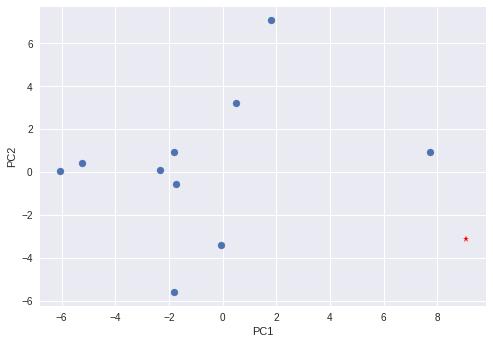

In [15]:
p=pca.fit_transform(ass)
plt.scatter(x=p[:10,0],y=p[:10,1])
plt.plot(p[10,0],p[10,1],'ro',marker="*")
plt.xlabel("PC1")
plt.ylabel("PC2")
#plt.savefig("pca.png")

In [16]:
np.cumsum(pca.explained_variance_ratio_)

array([0.41621464, 0.63009017, 0.78272917, 0.87956382, 0.95745704,
       0.98972635, 0.99802377, 0.99991219, 1.        ])

In [17]:
#Part 2

In [18]:
bulls=pd.read_csv("/home/hamish/University/Third Year/MAS369 - Machine Learning/Assignment 1/bulls.csv")

In [19]:
bulls #Gonna need to normalise it

,bullno,breed,price,frame,heightyear,fatreebody,pcntfree,backfat,finalht,finalwt
0,1,1,2200,7,51.0,1128,70.9,0.25,54.8,1720
1,2,1,2250,7,51.9,1108,72.1,0.25,55.3,1575
2,3,1,1625,6,49.9,1011,71.6,0.15,53.1,1410
3,4,1,4600,8,53.1,993,68.9,0.35,56.4,1595
4,5,1,2150,7,51.2,996,68.6,0.25,55.0,1488
...,...,...,...,...,...,...,...,...,...,...
71,72,8,1450,7,51.4,997,73.4,0.10,55.2,1454
72,73,8,1200,6,49.8,991,70.8,0.15,54.6,1475
73,74,8,1425,6,50.0,928,70.8,0.10,53.9,1375
74,75,8,1250,6,50.1,990,71.0,0.10,54.9,1564


In [100]:
bulls2 = bulls.drop(columns=["breed","price","bullno"])
#For answering questions about size which don't depend on price
bulls3 = bulls.drop(columns={"bullno"})
#For the other questions

In [42]:
scaler=StandardScaler()
scaler.fit(bulls2)
bulls2_sc=scaler.transform(bulls2)

In [43]:
scaler=StandardScaler()
scaler.fit(bulls3)
bulls3_sc=scaler.transform(bulls3)

In [50]:
pca=PCA(n_components=5)
pca.fit(bulls2_sc)

PCA(n_components=6)

In [101]:
bulls3

,breed,price,frame,heightyear,fatreebody,pcntfree,backfat,finalht,finalwt
0,1,2200,7,51.0,1128,70.9,0.25,54.8,1720
1,1,2250,7,51.9,1108,72.1,0.25,55.3,1575
2,1,1625,6,49.9,1011,71.6,0.15,53.1,1410
3,1,4600,8,53.1,993,68.9,0.35,56.4,1595
4,1,2150,7,51.2,996,68.6,0.25,55.0,1488
...,...,...,...,...,...,...,...,...,...
71,8,1450,7,51.4,997,73.4,0.10,55.2,1454
72,8,1200,6,49.8,991,70.8,0.15,54.6,1475
73,8,1425,6,50.0,928,70.8,0.10,53.9,1375
74,8,1250,6,50.1,990,71.0,0.10,54.9,1564


In [52]:
np.cumsum(pca.explained_variance_ratio_) #Use 5 variables as that accounts for 97% 

array([0.50689415, 0.72373325, 0.83318087, 0.89672542, 0.93514778,
       0.9592753 ])

In [53]:
#Suggests that the data is spread out in around 5 dimensions

In [26]:
#After removing the two columns and then normalising the thing, it seems you only need two principle components to summarize the sample.

In [27]:
pca.components_.T

array([[ 0.4339569 ,  0.00772821, -0.45234503,  0.2428179 ,  0.14299538],
       [ 0.44993132, -0.04279022, -0.41570891,  0.11335647,  0.06587066],
       [ 0.41232559,  0.12983655,  0.45029241,  0.24747874, -0.71934339],
       [ 0.35556181, -0.31550779,  0.56827313,  0.31478743,  0.57936738],
       [-0.1867048 ,  0.71471936, -0.03873196,  0.61811707,  0.16023789],
       [ 0.45285382,  0.10131509, -0.17665043, -0.21576938, -0.10953536],
       [ 0.26994696,  0.60051483,  0.25331192, -0.58243265,  0.29054729]])

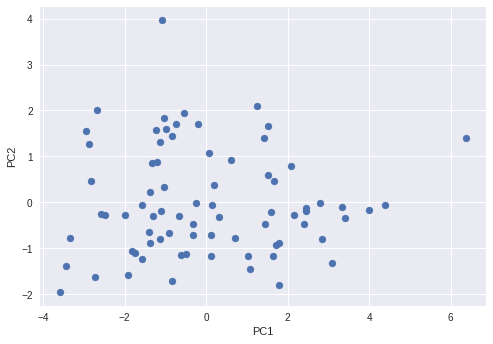

In [28]:
p=pca.fit_transform(bulls2_sc)
plt.scatter(x=p[:,0],y=p[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
targets = ['0', '1', '2']
colors = ['r', 'g', 'b'] 
#plt.savefig("pca.png")

Text(0, 0.5, 'cumulative variance')

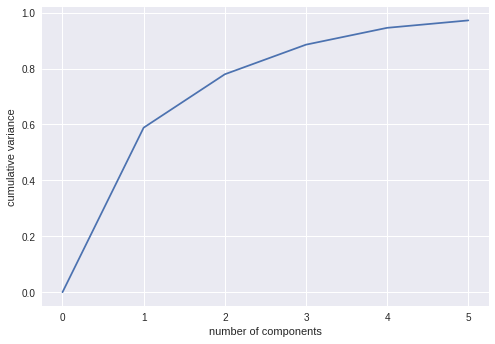

In [29]:
cumexp=np.concatenate([[0],pca.explained_variance_ratio_])
plt.plot(np.cumsum(cumexp))
plt.xlabel("number of components")
plt.ylabel("cumulative variance")

In [30]:
principleDf = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2',"PC3","PC4","PC5"], index=['frame', 'heightyear',"fatreebody","pcntfree","backfat","finalht","finalwt"])
graphdf = principleDf.drop(columns=["PC3","PC4","PC5"])
graphdf # Have to drop higher dimensions to get a plot

,PC1,PC2
frame,0.433957,0.007728
heightyear,0.449931,-0.042790
fatreebody,0.412326,0.129837
pcntfree,0.355562,-0.315508
backfat,-0.186705,0.714719
finalht,0.452854,0.101315
finalwt,0.269947,0.600515


In [189]:
X = bulls2_sc
y = bulls.breed

In [190]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
label_encoder=enc.fit(y)
y=label_encoder.transform(y)

In [191]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

In [157]:
logreg.coef_[0]

array([-0.01298599, -0.37339513, -0.30085707,  0.20353363,  1.13400192,
        0.06653577, -0.01461372])

In [158]:
logreg.intercept_

array([ 1.02717127, -0.52191138, -0.50525989])

In [159]:
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds, 
             bulls2.columns, 
             columns=['coef'])

,coef
frame,-0.012986
heightyear,-0.373395
fatreebody,-0.300857
pcntfree,0.203534
backfat,1.134002
finalht,0.066536
finalwt,-0.014614


In [161]:
y_pred=logreg.predict(X)
y_pred
#Bulls #6.11,18,25,32,33,35,36,37,39,40,42,43,73

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [162]:
y_pred=logreg.predict(X)
y_pred
#Bulls #6.11,18,25,32,33,35,36,37,39,40,42,43,73

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [38]:
y #32 0, 17 1,27 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
#Graph
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(bulls2_sc) 
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, bulls[['breed']]], axis = 1)
finalDf

,principal component 1,principal component 2,breed
0,1.426876,1.407609,1
1,1.514281,0.590662,1
2,-0.605145,-1.139748,1
3,1.516552,1.670269,1
4,0.196253,0.369729,1
...,...,...,...
71,1.067534,-1.453130,8
72,-0.331218,-0.708736,8
73,-0.824582,-1.705465,8
74,0.124126,-0.708947,8


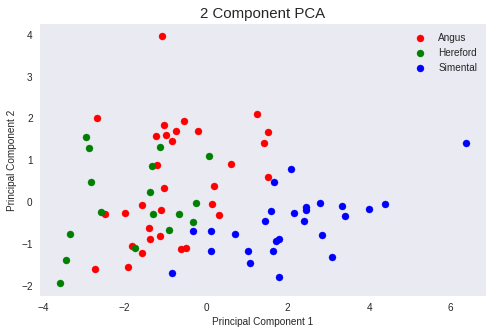

In [40]:
fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 Component PCA', fontsize = 15) 
targets = [1,5, 8]
colors = ['r', 'g', 'b'] 
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['breed'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] , finalDf.loc[indicesToKeep, 'principal component 2'] , c = color , s = 50)
ax.legend(labels = ["Angus","Hereford","Simental"])
ax.grid()
#plt.savefig("2comppca.png")

In [57]:
#Regression between Angus and Hereford breedsbulls3

In [116]:
bulls3_new = bulls3.drop(range(49,76))
bulls3_final = bulls3_new.drop(columns={"breed"})

In [117]:
#Scale bulls3
scaler=StandardScaler()
scaler.fit(bulls3_final)
bulls3_sc=scaler.transform(bulls3_final)

In [118]:
X = bulls3_sc
y = bulls3_new.breed

In [119]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
label_encoder=enc.fit(y)
y=label_encoder.transform(y)

In [121]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

In [124]:
y_pred=logreg.predict(X)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1])

In [126]:
logreg.predict_proba(X)

array([[0.88368441, 0.11631559],
       [0.95220518, 0.04779482],
       [0.75559401, 0.24440599],
       [0.9956607 , 0.0043393 ],
       [0.88441647, 0.11558353],
       [0.39461658, 0.60538342],
       [0.92536185, 0.07463815],
       [0.98127255, 0.01872745],
       [0.64795615, 0.35204385],
       [0.98025065, 0.01974935],
       [0.73720282, 0.26279718],
       [0.87639714, 0.12360286],
       [0.87980995, 0.12019005],
       [0.81609355, 0.18390645],
       [0.9018876 , 0.0981124 ],
       [0.85181766, 0.14818234],
       [0.82879241, 0.17120759],
       [0.29645153, 0.70354847],
       [0.64999465, 0.35000535],
       [0.7446556 , 0.2553444 ],
       [0.52288137, 0.47711863],
       [0.87586327, 0.12413673],
       [0.59029412, 0.40970588],
       [0.75650736, 0.24349264],
       [0.36322409, 0.63677591],
       [0.79883148, 0.20116852],
       [0.87933595, 0.12066405],
       [0.89396168, 0.10603832],
       [0.80928161, 0.19071839],
       [0.630987  , 0.369013  ],
       [0.

In [130]:
from sklearn import metrics
cm=metrics.confusion_matrix(y,y_pred)
cm

array([[28,  4],
       [ 9,  8]])

In [131]:
score = logreg.score(X,y)
score

0.7346938775510204

Text(0.5, 1.0, 'Confusion Matrix')

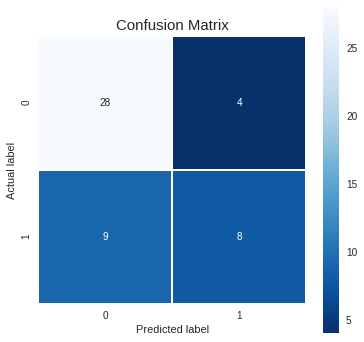

In [137]:
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt="d",linewidths=.5,square=True,cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title="Accuracy Score: {0}".format(score)
plt.title("Confusion Matrix",size=15)
#plt.savefig("confusion.png")

In [197]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [198]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [199]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1])

In [200]:
y_pred

array([0, 0, 0, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0])

In [201]:
df = [[7,50,1000,73,0.17,54,1525]]
logreg.predict(df)

array([2])

In [206]:
logreg.score(X,y)

0.8026315789473685

In [208]:
accuracy=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
accuracy

0.7346938775510204